In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns

In [10]:
df = pd.read_csv("diamonds.csv")

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'dim']
   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

         dim  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250  


/Users/kevinzavier/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


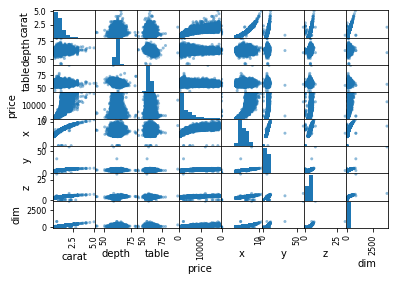

In [22]:
#print(df.head())
print(list(df))
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('depth', axis=1, inplace=True)
#df.drop('table', axis=1, inplace=True)
df['dim'] = df['x'] * df['y'] * df['z']
print(df.head())
pd.scatter_matrix(df)
plt.show()

In [44]:
def standardize_cut(string):
    
    string = string.lower()
    string = string.strip()
    
    if "fair" in string:
        output = "0"
    elif "good" in string:
        output = "1"
    elif "very good" in string:
        output = "2"
    elif "premium" in string:
        output = "3"
    elif "ideal" in string:
        output = "4"
    else:
        output = string
    
    return int(output)

def standardize_color(string):
    
    string = string.lower()
    string = string.strip()
    
    if "j" in string:
        output = "0"
    elif "i" in string:
        output = "1"
    elif "h" in string:
        output = "2"
    elif "g" in string:
        output = "3"
    elif "f" in string:
        output = "4"
    elif "e" in string:
        output = "5"
    elif "d" in string:
        output = "6"
    else:
        return output
    
    return int(output)

def standardize_clarity(string):
    
    string = string.lower()
    string = string.strip()
    
    if "fl" in string:
        output = "10"
    elif "if" in string:
        output = "9"
    elif "vvs1" in string:
        output = "8"
    elif "vvs2" in string:
        output = "7"
    elif "vs1" in string:
        output = "6"
    elif "vs2" in string:
        output = "5"
    elif "si1" in string:
        output = "4"
    elif "si2" in string:
        output = "3"
    elif "i1" in string:
        output = "2"
    elif "i2" in string:
        output = "1"
    elif "i3" in string:
        output = "0"
    else:
        output = string
    
    return int(output)

In [45]:
df["cut"] = df["cut"].apply(standardize_cut)
df["color"] = df["color"].apply(standardize_color)
df["clarity"] = df["clarity"].apply(standardize_clarity)

In [46]:
print (df)

       Unnamed: 0  carat cut color clarity  depth  table  price     x     y  \
0               1   0.23   4     5       3   61.5   55.0    326  3.95  3.98   
1               2   0.21   3     5       4   59.8   61.0    326  3.89  3.84   
2               3   0.23   1     5       6   56.9   65.0    327  4.05  4.07   
3               4   0.29   3     1       5   62.4   58.0    334  4.20  4.23   
4               5   0.31   1     0       3   63.3   58.0    335  4.34  4.35   
5               6   0.24   1     0       7   62.8   57.0    336  3.94  3.96   
6               7   0.24   1     1       8   62.3   57.0    336  3.95  3.98   
7               8   0.26   1     2       4   61.9   55.0    337  4.07  4.11   
8               9   0.22   0     5       5   65.1   61.0    337  3.87  3.78   
9              10   0.23   1     2       6   59.4   61.0    338  4.00  4.05   
10             11   0.30   1     0       4   64.0   55.0    339  4.25  4.28   
11             12   0.23   4     0       6   62.8   